# **Task 2** - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. (Unsupervised ML) 
#### Using K-Means clustering

-By Himangshu Baruah

## Importing the Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets

sns.set()

## Impoting the datasets 

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Plot the data ( iris_df ) 




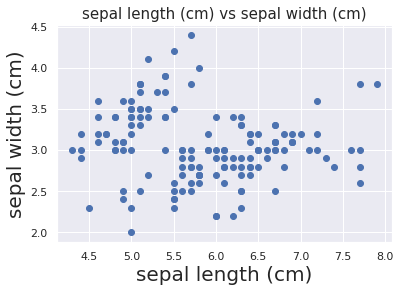

In [3]:
plt.scatter(iris_df['sepal length (cm)'] , iris_df['sepal width (cm)'] )
plt.title('sepal length (cm) vs sepal width (cm)' , fontsize = '15')
plt.xlabel('sepal length (cm)' , fontsize = '20')
plt.ylabel('sepal width (cm)',fontsize = '20')
plt.show()

## Clustering (Unscaled Data) 
Seperating the Data into 2 clusters (starting no. of clusters)
Then proceed to 3,4,... clusters ( until find the optinum no. fo clusters) 

In [4]:
from sklearn.cluster import KMeans
x = iris_df.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
clusters_unscaled = iris_df.copy()
clusters_unscaled['cluster_pred']=kmeans.fit_predict(x)

### Plot the unscaled data:(into 2 clusters) 

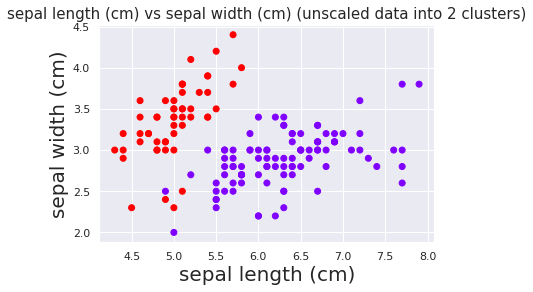

In [6]:
plt.scatter(clusters_unscaled['sepal length (cm)'], clusters_unscaled['sepal width (cm)'], 
            c= clusters_unscaled['cluster_pred'], cmap = 'rainbow')
plt.title('sepal length (cm) vs sepal width (cm) (unscaled data into 2 clusters)' , fontsize = '15')
plt.xlabel('sepal length (cm)' , fontsize = '20')
plt.ylabel('sepal width (cm)',fontsize = '20')
plt.show()

## Standardize the variables

In [7]:
from sklearn.preprocessing import scale
x_scaled = scale(iris_df)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Clustering (Scaled data) 

In [8]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
clusters_scaled = iris_df.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

## Comparing the Graphs of the unscaled data and the scaled data

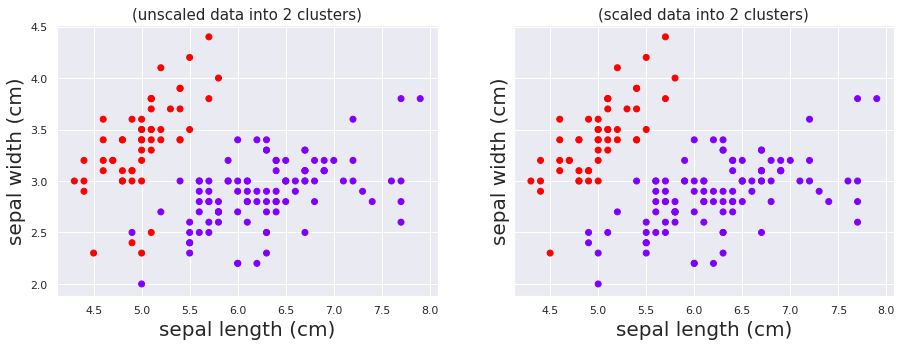

In [10]:
f , (ax1 , ax2) = plt.subplots(1,2 , sharey = True , figsize = (15,5))
ax1.scatter(clusters_unscaled['sepal length (cm)'], clusters_unscaled['sepal width (cm)'], 
            c= clusters_unscaled['cluster_pred'], cmap = 'rainbow')
ax1.set_title('(unscaled data into 2 clusters)' , fontsize = '15')
ax1.set_xlabel('sepal length (cm)' , fontsize = '20')
ax1.set_ylabel('sepal width (cm)',fontsize = '20')

ax2.scatter(clusters_scaled['sepal length (cm)'], clusters_scaled['sepal width (cm)'], 
            c= clusters_scaled['cluster_pred'], cmap = 'rainbow')
ax2.set_title('(scaled data into 2 clusters)' , fontsize = '15')
ax2.set_xlabel('sepal length (cm)' , fontsize = '20')
ax2.set_ylabel('sepal width (cm)',fontsize = '20')
plt.show()

From the above two graphs, we have seen that scaled data has better clusters. Thus we proceed for scaled data.

## Elbow Method:

### Finding WCSS ( Within Cluster Sum of Squares ) 

In [11]:
wcss = []

cl_max_num = 10
for i in range (1,cl_max_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 222.36170496502308,
 140.0327527742865,
 114.35385298004148,
 90.80759161913358,
 80.03665614250882,
 72.32576120186155,
 62.47348635221407,
 55.13587648575239]

### The Elbow Method Graph

Text(0, 0.5, 'Within-cluster Sum of Squares')

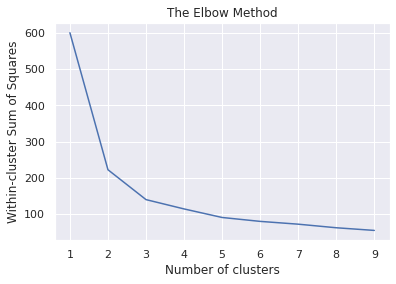

In [12]:
number_clusters = range(1,cl_max_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Based on the Elbow Curve, 2, 3 or 5 (no. of clusters) seem the most likely

## Data into 2 clusters

In [13]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
clusters_2 = iris_df.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

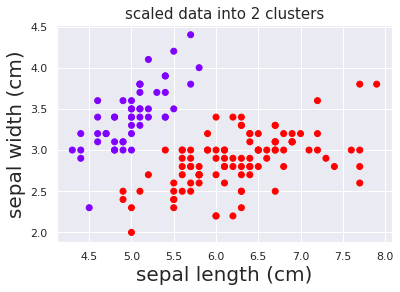

In [15]:
plt.scatter(clusters_2['sepal length (cm)'], clusters_2['sepal width (cm)'], 
            c= clusters_2['cluster_pred'], cmap = 'rainbow')
plt.title('scaled data into 2 clusters' , fontsize = '15')
plt.xlabel('sepal length (cm)' , fontsize = '20')
plt.ylabel('sepal width (cm)',fontsize = '20')
plt.show()

## Data into 3 clusters

In [16]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
clusters_3 = iris_df.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

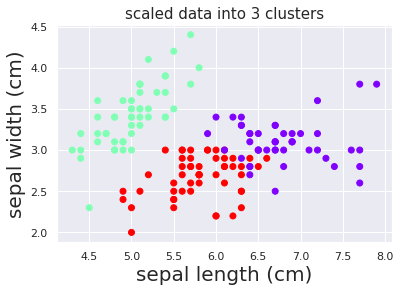

In [18]:

plt.scatter(clusters_3['sepal length (cm)'], clusters_3['sepal width (cm)'], 
            c= clusters_3['cluster_pred'], cmap = 'rainbow')
plt.title('scaled data into 3 clusters' , fontsize = '15')
plt.xlabel('sepal length (cm)' , fontsize = '20')
plt.ylabel('sepal width (cm)',fontsize = '20')
plt.show()

## Data into 5 clusters

In [19]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
clusters_5 = iris_df.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

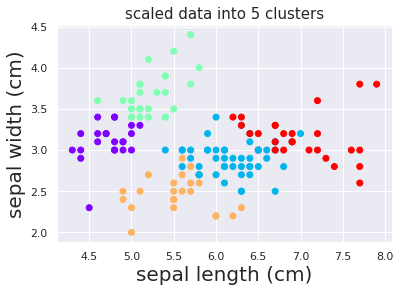

In [21]:
plt.scatter(clusters_5['sepal length (cm)'], clusters_5['sepal width (cm)'], 
            c= clusters_5['cluster_pred'], cmap = 'rainbow')
plt.title('scaled data into 5 clusters' , fontsize = '15')
plt.xlabel('sepal length (cm)' , fontsize = '20')
plt.ylabel('sepal width (cm)',fontsize = '20')
plt.show()

## Comparision of 2,3,5 clusters


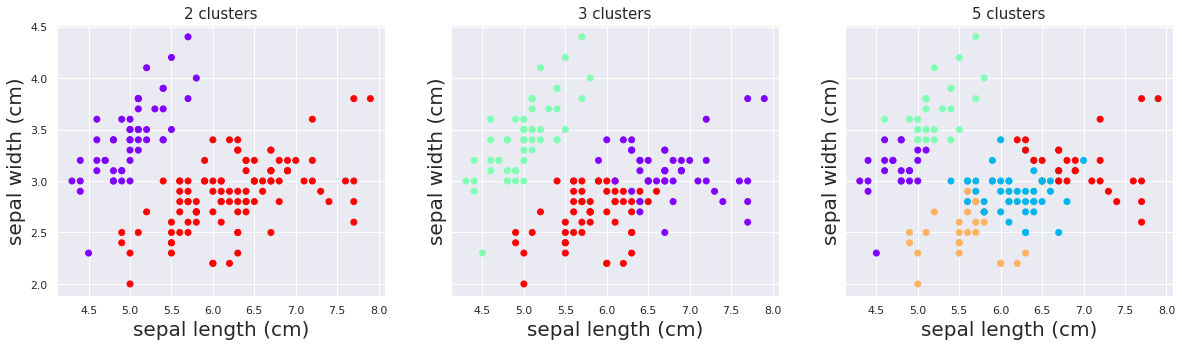

In [22]:
f , (ax1 , ax2, ax3) = plt.subplots(1,3 , sharey = True , figsize = (20,5))
ax1.scatter(clusters_2['sepal length (cm)'], clusters_2['sepal width (cm)'], 
            c= clusters_2['cluster_pred'], cmap = 'rainbow')
ax1.set_title('2 clusters' , fontsize = '15')
ax1.set_xlabel('sepal length (cm)' , fontsize = '20')
ax1.set_ylabel('sepal width (cm)',fontsize = '20')

ax2.scatter(clusters_3['sepal length (cm)'], clusters_3['sepal width (cm)'], 
            c= clusters_3['cluster_pred'], cmap = 'rainbow')
ax2.set_title('3 clusters' , fontsize = '15')
ax2.set_xlabel('sepal length (cm)' , fontsize = '20')
ax2.set_ylabel('sepal width (cm)',fontsize = '20')

ax3.scatter(clusters_5['sepal length (cm)'], clusters_5['sepal width (cm)'], 
            c= clusters_5['cluster_pred'], cmap = 'rainbow')
ax3.set_title('5 clusters' , fontsize = '15')
ax3.set_xlabel('sepal length (cm)' , fontsize = '20')
ax3.set_ylabel('sepal width (cm)',fontsize = '20')

plt.show()

## Original dataset along with species

In [23]:
real_data = pd.read_csv('Iris(real).csv')
real_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [24]:
real_data['Species'] = real_data['Species'].map({'Iris-virginica':0, 
                                                 'Iris-setosa':1 , 
                                                 'Iris-versicolor':2})
real_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


## Real Data vs Predicted Data ( Clustering )

Green : Iris-versicolor , Red : Iris-setosa , Violet : Iris-virginica


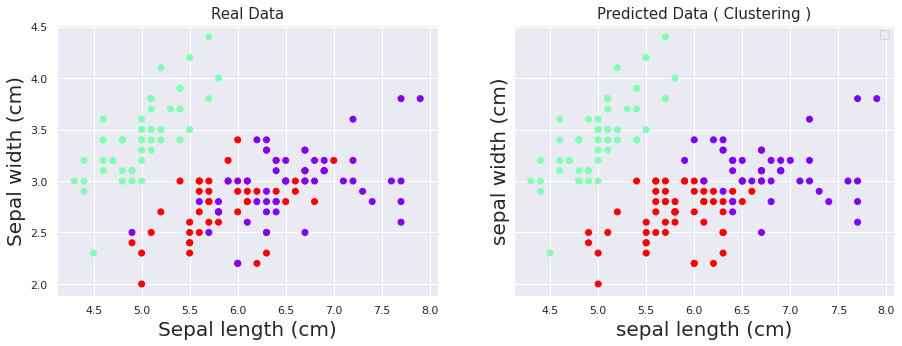

In [25]:
print('Green : Iris-versicolor , Red : Iris-setosa , Violet : Iris-virginica')
f , (ax1,ax2) = plt.subplots(1,2, sharey=True , figsize=(15,5))
ax1.scatter(real_data['SepalLengthCm'],real_data['SepalWidthCm'],c=real_data['Species'],cmap='rainbow')
ax1.set_title('Real Data',fontsize='15')
ax1.set_xlabel('Sepal length (cm)',fontsize='20')
ax1.set_ylabel('Sepal width (cm)',fontsize='20')


ax2.scatter(clusters_3['sepal length (cm)'], clusters_3['sepal width (cm)'],c= clusters_3['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Predicted Data ( Clustering )' , fontsize = '15')
ax2.set_xlabel('sepal length (cm)' , fontsize = '20')
ax2.set_ylabel('sepal width (cm)',fontsize = '20')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

plt.show()